#### <h1> <font color='blue'> COVID 19 Time Series Analysis </font></h1>

<h3>Time series provide the opportunity to forecast future values. Based on previous values, time series can be used to forecast trends in economics, weather, and capacity planning, to name a few. The specific properties of time-series data mean that specialized statistical methods are usually required.<br>
The following analysis is about the COVID cases confirmed across the world.</h3>

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import ployly libraries
import plotly.express as px
import plotly.graph_objects as go

# Disable warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Import library to create leaflet maps
import folium
from folium import plugins

# Change the default plot size
plt.rcParams['figure.figsize'] = 10, 12

## Read the datasets

In [8]:
# Read data from csv file
df = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\CovidcasesinIndia.xlsx')

df_india = df.copy()

In [13]:
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [15]:
# Read the coordinates for Indian States
India_cord = pd.read_excel('D:\Study\DataScience\Data\MachineLearningData\CovidData\IndianCoordinates.xlsx')

In [17]:
# Read the day by day data for India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'India')
dbd_Italy = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'Italy')
dbd_Korea = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'Korea')
dbd_Wuhan = pd.read_excel('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\per_day_cases.xlsx', 
                          parse_dates=True, sheet_name= 'Wuhan')

In [24]:
# Get the columns names
df.columns

# ['S. No.', 'Name of State / UT', 'Total Confirmed cases (Indian National)', 'Total Confirmed cases ( Foreign National )', 'Cured', 'Death']

# Remove 'S. No.' column
#df = df.drop(['S. No.'], axis = 1)

In [27]:
# Create new column as 'Total Cases' having sum of Indian and Foreign cases
df['Total Cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

# Print the total number of Covid cases
total_cases = df['Total Cases'].sum()

print('Total number of Covid Cases are: {}'.format(total_cases))

Total number of Covid Cases are: 562


In [32]:
# Hightlight the cells of dataframe according to the number of cases
df.style.background_gradient(cmap='Greens')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


In [33]:
# Calculate total number of active cases across the states
# active cases = total cases - (recovered + deaths)

df['Total Active Cases'] = df['Total Cases'] - (df['Cured'] + df['Death'])

# Sum of total active cases
total_active_cases = df['Total Active Cases'].sum()
print('Total active cases across India are: {}'.format(total_active_cases))

Total active cases across India are: 512


In [35]:
# Group by states and display dataframe cell as per total cases
Tot_Cases = df.groupby('Name of State / UT')['Total Active Cases'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Total Active Cases
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [39]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_cord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## Visualize the COVID cases data per Indian States

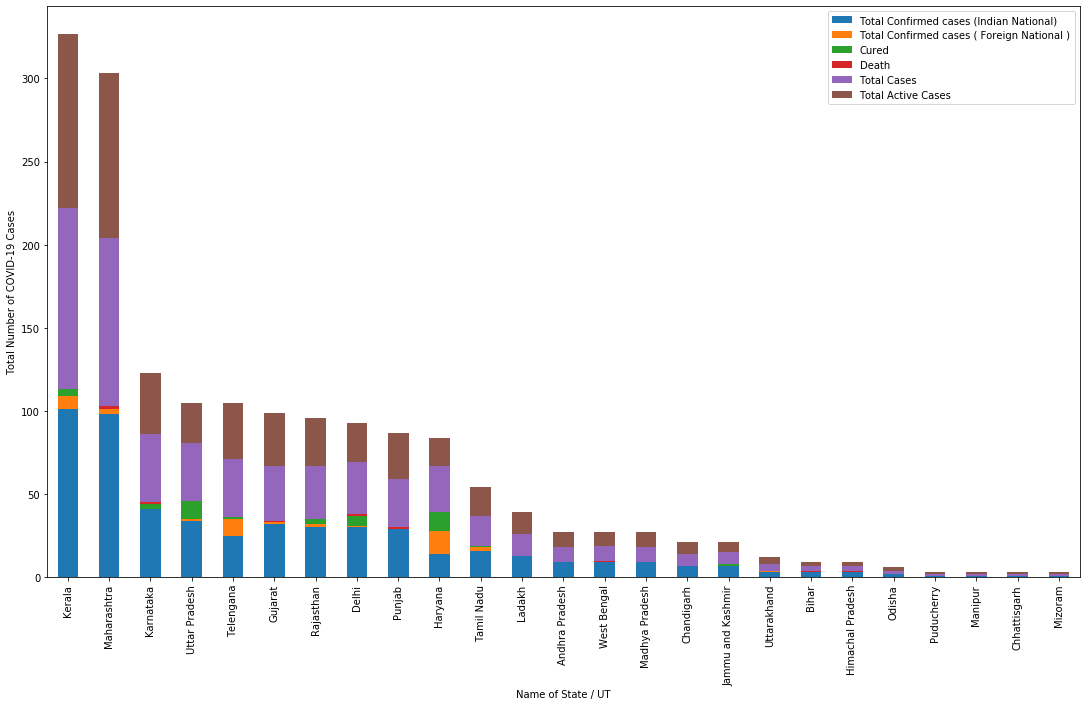

In [50]:
# Plot Stacked bar plot for total, cured and dead cases
# Set the index as States if it is not

data = df.copy()

#Oreder the dataframe by total number of cases
data_sorted = data.sort_values(by=['Total Cases'], ascending= False)
data_sorted.set_index('Name of State / UT', inplace = True)
ax = data_sorted.plot(kind='bar', stacked=True, figsize=(18.5, 10.5))
ax.set_ylabel('Total Number of COVID-19 Cases')
plt.show()

In [3]:
# Read cleaned csv for worldwide COVID cases per day
df_world = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\covid_19_clean_complete.csv', parse_dates=['Date'])

In [4]:
# Rename column 'Country/Region' as 'Country'
df_world = df_world.rename(columns={'Country/Region': 'Country'})

# Extracting cases only from India
df_India = df_world.query('Country=="India"').groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [5]:
df_India = df_India.iloc[:-1]

## Visualize COVID cases across India

Text(0.5, 1.0, 'Covid cases across India')

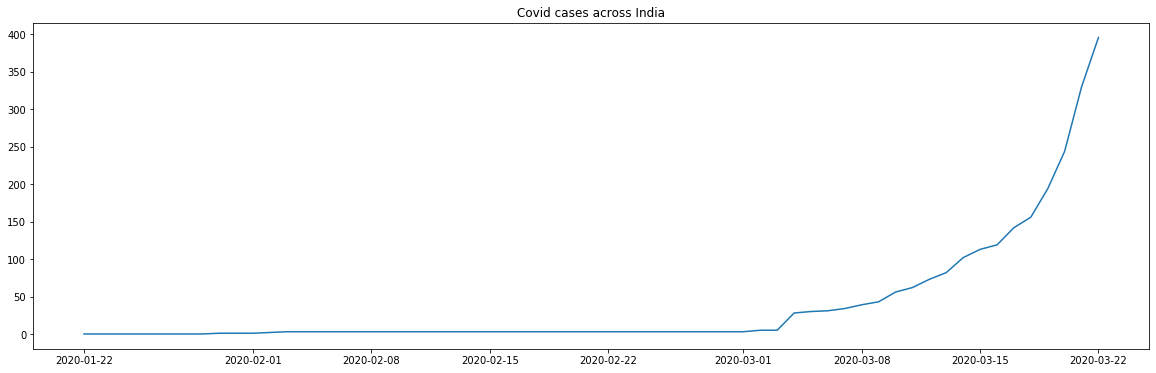

In [25]:
plt.figure(figsize=(20,6))
plt.plot(df_India['Date'], df_India['Confirmed'])
plt.title('Covid cases across India')

In [15]:
# Analyze the world wise trend of Covid Cases

df = pd.read_csv('D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("D:\\Study\\DataScience\\Data\\MachineLearningData\\CovidData\\time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [18]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [19]:
# Visualizing worldwide cases

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

## Visualize COVID cases across the world

Text(0.5, 1.0, 'Covid cases across the world')

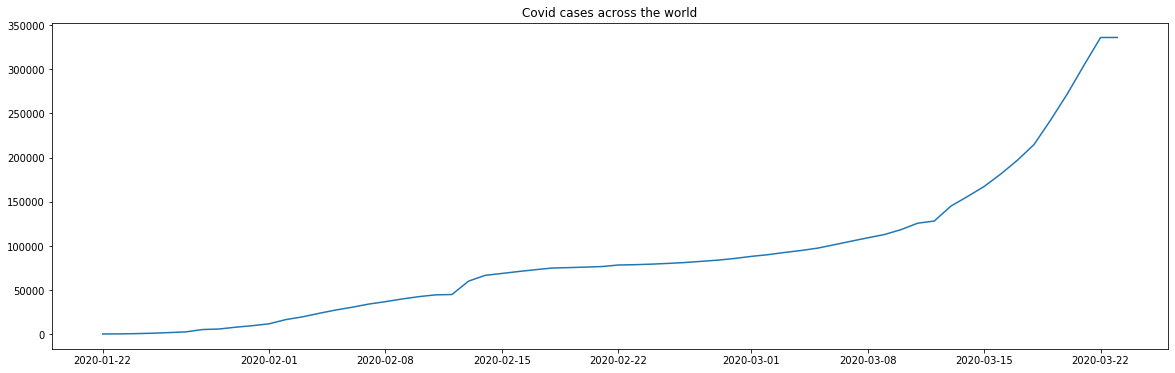

In [27]:
plt.figure(figsize=(20,6))
plt.plot(confirmed['Date'], confirmed['Confirmed'])
plt.title('Covid cases across the world')

In [29]:
confirmed = confirmed[:-1]

# 1. Use fbprophet library to forecast COVID cases

In [31]:
from fbprophet import Prophet

The input to Prophet is always a dataframe with two columns: **ds** and **y**. 
The **ds (datestamp)** column should be of a timestamp format.
The **y** column must be numeric, and represents the measurement we wish to forecast.

In [35]:
# The current 'confirmed dataframe has two columns - 'Date' and 'Confirmed'
# Rename the columns to 'ds' and 'y' as required by Prophet.
confirmed.columns = ['ds', 'y']

# Change the data type of 'ds' column to timestamp.
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [74]:
confirmed.head()

,ds,y
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [40]:
# Create a future dataframe using Prophet to forecast for 7 periods in our case 7 days with 95% confidence interval
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29


In [42]:
# Forecast using future dataframe
forecast = m.predict(future)
forecast.tail()

# Select only ['ds', 'yhat', 'yhat_lower', 'yhat_upper'] columns
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
63,2020-03-25,316241.354193,291748.435077,341010.062773
64,2020-03-26,330542.658271,306707.031344,355514.137574
65,2020-03-27,345826.530147,322803.709415,371297.898222
66,2020-03-28,360451.981664,333957.657224,384970.793703
67,2020-03-29,375270.492214,350380.031979,402548.353694


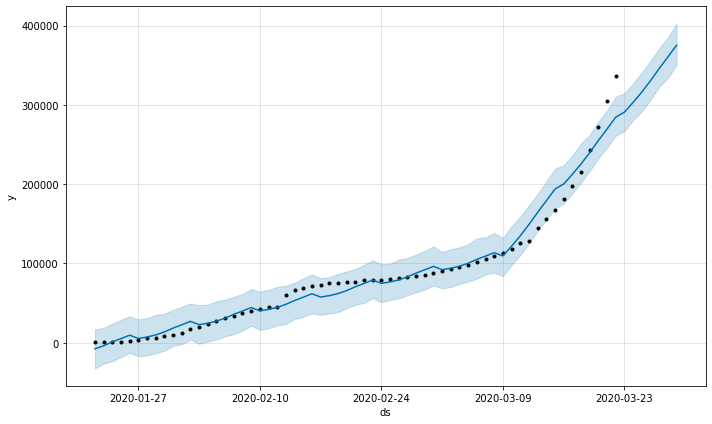

In [44]:
# Plot the forecast results
future_forecast_plot = m.plot(forecast)

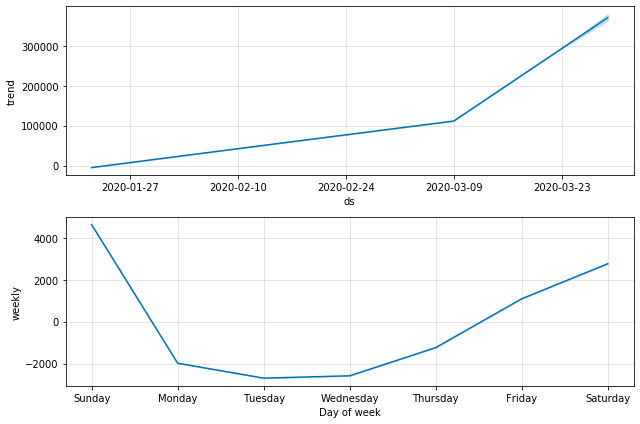

In [45]:
# Plot the components such as trend and/or seasonality of the forecast
confirmed_forecast_plot = m.plot_components(forecast)

# 2. Use Statsmodels SARIMAX to forecast COVID cases

In [171]:
# Import statmdoels for timeseries
import statsmodels.api as sm

In [58]:
# Change column type as timestamp
data = confirmed.copy()

data.columns = ['Date', 'Cases']
data['Date'] = pd.to_datetime(data['Date'])

# Set index as Date column
data.set_index('Date', inplace = True)

In [62]:
# Set parameters for plot
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

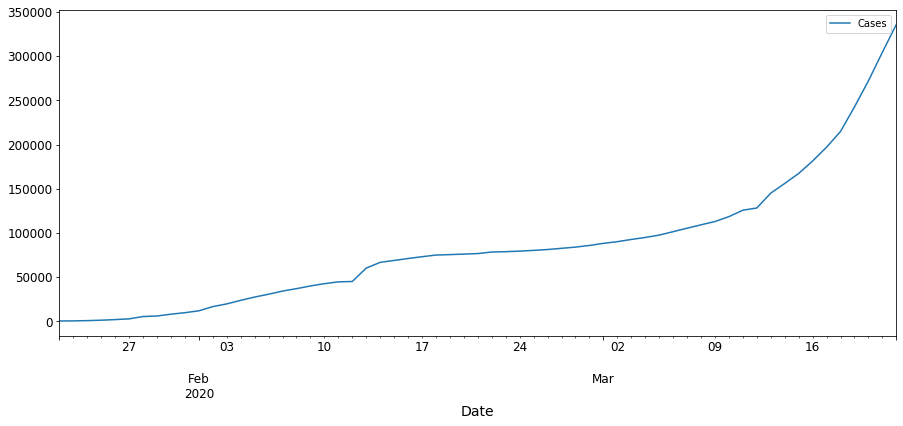

In [63]:
# Plot the to visualize time series data
data.plot(figsize=(15, 6))
plt.show()

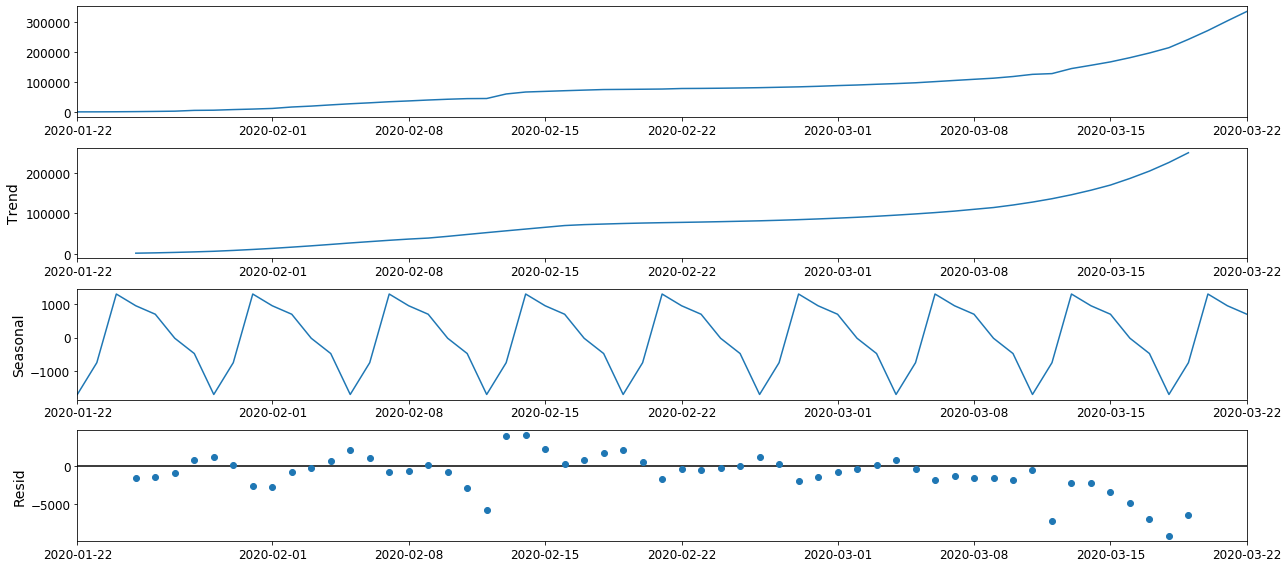

In [65]:
# Set default figure size
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Use decomposition method to visualize various components of time series data
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()


In [67]:
# Import itertools library to find all possible combinations of p, d and q
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [68]:
# Perform Grid Search to find optimal parameters for ARIMA
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA {} x {} X 12 - AIC:{}'.format(param, param_seasonal, np.round(results.aic, 2)))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12) X 12 - AIC:1569.47
ARIMA (0, 0, 0) x (0, 0, 1, 12) X 12 - AIC:2735.52
ARIMA (0, 0, 0) x (0, 1, 0, 12) X 12 - AIC:1206.19
ARIMA (0, 0, 0) x (0, 1, 1, 12) X 12 - AIC:1389.37
ARIMA (0, 0, 0) x (1, 0, 0, 12) X 12 - AIC:1179.47
ARIMA (0, 0, 0) x (1, 0, 1, 12) X 12 - AIC:1151.7
ARIMA (0, 0, 0) x (1, 1, 0, 12) X 12 - AIC:920.1
ARIMA (0, 0, 0) x (1, 1, 1, 12) X 12 - AIC:869.96
ARIMA (0, 0, 1) x (0, 0, 0, 12) X 12 - AIC:1504.43
ARIMA (0, 0, 1) x (0, 0, 1, 12) X 12 - AIC:2686.83
ARIMA (0, 0, 1) x (0, 1, 0, 12) X 12 - AIC:1149.28
ARIMA (0, 0, 1) x (0, 1, 1, 12) X 12 - AIC:848.7
ARIMA (0, 0, 1) x (1, 0, 0, 12) X 12 - AIC:1241.1
ARIMA (0, 0, 1) x (1, 0, 1, 12) X 12 - AIC:1192.3
ARIMA (0, 0, 1) x (1, 1, 0, 12) X 12 - AIC:905.08
ARIMA (0, 0, 1) x (1, 1, 1, 12) X 12 - AIC:854.42
ARIMA (0, 1, 0) x (0, 0, 0, 12) X 12 - AIC:1252.97
ARIMA (0, 1, 0) x (0, 0, 1, 12) X 12 - AIC:995.36
ARIMA (0, 1, 0) x (0, 1, 0, 12) X 12 - AIC:995.54
ARIMA (0, 1, 0) x (0, 1, 1, 12) X 12 - AIC:

From above results we can see that **ARIMA (1, 1, 0) x (1, 1, 0, 12) X 12** -- Gives minimum AIC value of **687.88**.

In [69]:
# Use ARIMA (1, 1, 0) x (1, 1, 0, 12) X 12
mod = sm.tsa.statespace.SARIMAX(data,order=(1, 1, 0), seasonal_order=(1, 1, 0, 12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0304      0.107      9.592      0.000       0.820       1.241
ar.S.L12      -0.4729      0.137     -3.459      0.001      -0.741      -0.205
sigma2      2.248e+07   5.01e-10   4.49e+16      0.000    2.25e+07    2.25e+07


The **summary** attribute that results from the output of SARIMAX returns a significant amount of information, but we’ll focus our attention on the table of coefficients. The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

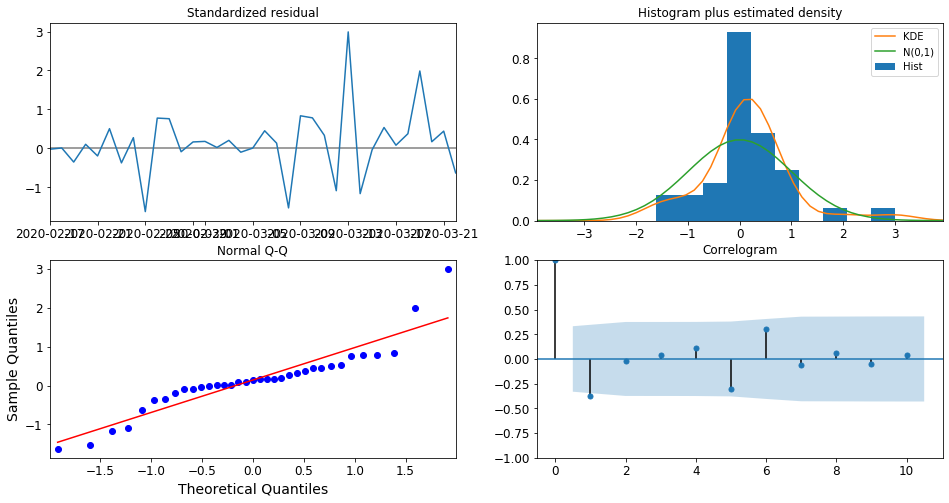

In [70]:
# Run model diagonstics
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are **NOT** normally distributed based on the following:

In the top right plot, we see that the red KDE line **DOES NOT** follow closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) **DOES NOT** follow the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are **NOT** normally distributed.

The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Although we have a satisfactory fit, some parameters of our seasonal ARIMA model could be changed to improve our model fit. For example, our grid search only considered a restricted set of parameter combinations, so we may find better models if we widened the grid search.

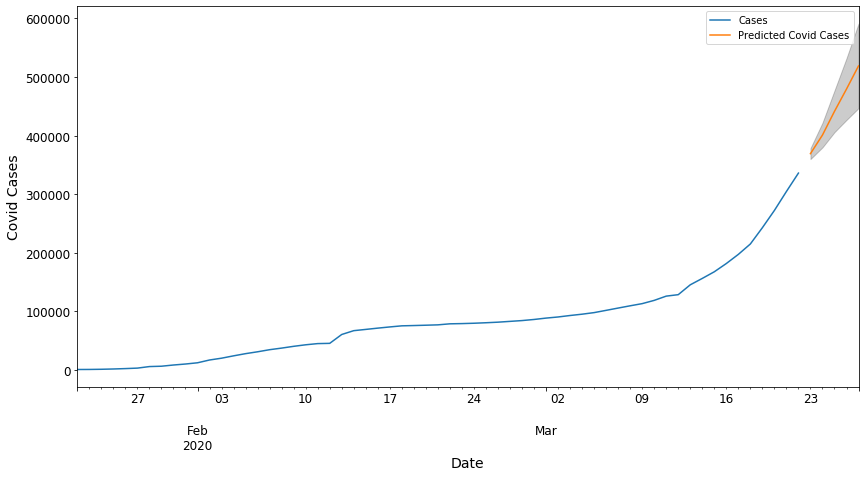

In [170]:
# Validating forecasts

# Creating a dataframe to forecast covid cases for 5 days in future
date_range = ['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27']
pred_df = pd.DataFrame(columns=['lower_pred', 'mean_pred', 'higher_pred'])
for date in date_range:
    pred = results.get_prediction(start=pd.to_datetime(date), dynamic=False)
    pred_ci = pred.conf_int()
    lower_pred = pred_ci.iloc[0][0]
    higher_pred = pred_ci.iloc[0][1]
    mean_pred = pred.predicted_mean[0]
  
    pred_df = pred_df.append({'lower_pred': lower_pred, 'mean_pred': mean_pred, 'higher_pred': higher_pred}, ignore_index = True)

index = pd.to_datetime(date_range)
pred_df.index = index

# Plotting the predicted cases along with confirmed cases
ax = data.plot(label='Confirmed Cases', figsize=(14, 7))
ax = pred_df.iloc[:,1].plot(label='Predicted Covid Cases')
ax.fill_between(pred_df.index, pred_df.iloc[:, 0], pred_df.iloc[:, 2], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Covid Cases')
plt.legend()
plt.show()